In [ ]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
from shapely.geometry import Point #location
%pylab inline
%matplotlib inline




Populating the interactive namespace from numpy and matplotlib


In [ ]:
listings = pd.read_csv('listings.csv')

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7733 entries, 0 to 7732
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7733 non-null   int64  
 1   listing_url                                   7733 non-null   object 
 2   scrape_id                                     7733 non-null   int64  
 3   last_scraped                                  7733 non-null   object 
 4   source                                        7733 non-null   object 
 5   name                                          7733 non-null   object 
 6   description                                   7691 non-null   object 
 7   neighborhood_overview                         5502 non-null   object 
 8   picture_url                                   7733 non-null   object 
 9   host_id                                       7733 non-null   i

In [ ]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6422,https://www.airbnb.com/rooms/6422,20220915162211,2022-09-15,city scrape,Nashville Charm,30 day or more rental during COVID. Show COVID...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/pro_photo_too...,12172,...,4.96,4.92,4.98,NaN,f,1,0,1,0,4.14
1,39870,https://www.airbnb.com/rooms/39870,20220915162211,2022-09-15,city scrape,Close to Vanderbilt 2,"Since I am older, I need for guests to be vacc...","The house is in a safe, quiet, ""college"" neig...",https://a0.muscache.com/pictures/43420407-69b6...,171184,...,4.97,4.95,4.94,NaN,f,2,0,2,0,4.49
2,59576,https://www.airbnb.com/rooms/59576,20220915162211,2022-09-15,city scrape,Large Master Suite near Lake *ladies only NS plz,non-smokers only please<br /><br />furnished r...,We live on a cul-de-sac in a small community o...,https://a0.muscache.com/pictures/b15c851c-318e...,812128,...,5.00,5.00,5.00,NaN,f,10,1,9,0,0.37
3,72906,https://www.airbnb.com/rooms/72906,20220915162211,2022-09-15,city scrape,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,Entire top floor. Private. 800 sq ft of bright...,Historic Belmont-Hillsboro neighborhood. Walk-...,https://a0.muscache.com/pictures/58602855/3788...,176117,...,4.99,4.96,4.89,NaN,f,1,1,0,0,4.79
4,258817,https://www.airbnb.com/rooms/258817,20220915162211,2022-09-15,city scrape,"ButterflyRoom-queen room, private bath",Morningstar House! Extended stay - 3+ months- ...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/eef19bc4-2743...,22296,...,4.90,4.74,4.73,NaN,f,8,0,7,1,0.73


In [ ]:
summary_listings = pd.read_csv('summary-listings.csv')

summary_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7733 entries, 0 to 7732
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7733 non-null   int64  
 1   name                            7733 non-null   object 
 2   host_id                         7733 non-null   int64  
 3   host_name                       7653 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7733 non-null   object 
 6   latitude                        7733 non-null   float64
 7   longitude                       7733 non-null   float64
 8   room_type                       7733 non-null   object 
 9   price                           7733 non-null   int64  
 10  minimum_nights                  7733 non-null   int64  
 11  number_of_reviews               7733 non-null   int64  
 12  last_review                     68

In [ ]:
summary_listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,7.733000e+03,7.733000e+03,0.0,7733.000000,7733.000000,7733.000000,7733.000000,7733.000000,6824.000000,7733.000000,7733.000000,7733.000000,0.0
mean,1.649746e+17,1.513851e+08,NaN,36.164088,-86.767008,288.516746,5.912582,63.792836,2.447676,23.402173,212.923574,20.892151,NaN
std,2.783293e+17,1.448271e+08,NaN,0.045152,0.055741,437.690936,22.712800,100.202689,2.552981,39.658819,124.666785,27.031534,NaN
min,6.422000e+03,1.147000e+03,NaN,35.968580,-87.035210,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.938962e+07,2.946659e+07,NaN,36.144089,-86.795937,129.000000,1.000000,4.000000,0.870000,1.000000,107.000000,2.000000,NaN
50%,4.718118e+07,1.014269e+08,NaN,36.160140,-86.775414,204.000000,2.000000,25.000000,1.970000,4.000000,245.000000,12.000000,NaN
75%,5.529814e+17,2.433585e+08,NaN,36.186840,-86.742370,323.000000,3.000000,82.000000,3.400000,25.000000,330.000000,32.000000,NaN
max,7.160166e+17,4.789865e+08,NaN,36.404770,-86.517890,10500.000000,999.000000,1197.000000,93.660000,178.000000,365.000000,768.000000,NaN


In [ ]:
summary_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6422,Nashville Charm,12172,Michele,NaN,District 6,36.17315,-86.73581,Private room,40,30,674,2020-03-03,4.14,1,257,0,NaN
1,39870,Close to Vanderbilt 2,171184,Evelyn,NaN,District 18,36.12523,-86.81278,Private room,72,1,328,2022-09-11,4.49,2,134,64,NaN
2,59576,Large Master Suite near Lake *ladies only NS plz,812128,Patricia And John,NaN,District 12,36.18749,-86.59004,Private room,39,31,1,2022-06-26,0.37,10,180,1,NaN
3,72906,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,176117,Richard,NaN,District 18,36.13122,-86.80066,Entire home/apt,105,2,658,2022-09-11,4.79,1,59,56,NaN
4,258817,"ButterflyRoom-queen room, private bath",22296,Diana,NaN,District 12,36.16249,-86.58988,Private room,39,30,96,2019-12-14,0.73,8,288,0,NaN


In [ ]:
summary_listings.isnull().sum()/len(summary_listings)

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.010345
neighbourhood_group               1.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.117548
reviews_per_month                 0.117548
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                           1.000000
dtype: float64

In [ ]:
len(summary_listings[summary_listings['price'] == 0])

1

In [ ]:
len(summary_listings[summary_listings['host_name'] == 0])

0

In [ ]:
summary_listings['price'].describe()

count     7733.000000
mean       288.516746
std        437.690936
min          0.000000
25%        129.000000
50%        204.000000
75%        323.000000
max      10500.000000
Name: price, dtype: float64

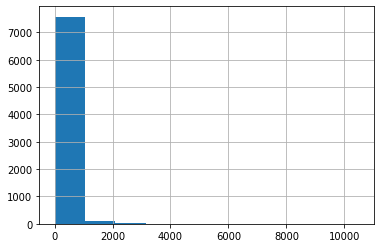

In [ ]:
summary_listings['price'].hist()

In [ ]:
summary_listings['neighbourhood'].unique()

array(['District 6', 'District 18', 'District 12', 'District 19',
       'District 14', 'District 7', 'District 21', 'District 24',
       'District 10', 'District 17', 'District 16', 'District 25',
       'District 5', 'District 15', 'District 34', 'District 23',
       'District 30', 'District 26', 'District 27', 'District 20',
       'District 11', 'District 8', 'District 35', 'District 33',
       'District 2', 'District 4', 'District 13', 'District 29',
       'District 9', 'District 1', 'District 22', 'District 31',
       'District 3', 'District 28', 'District 32'], dtype=object)

<BarContainer object of 35 artists>

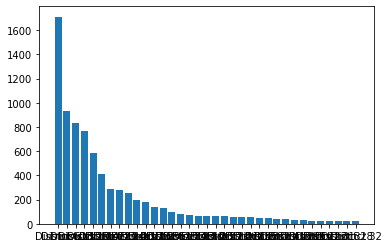

In [ ]:
data = summary_listings['neighbourhood'].value_counts().tolist()
a = summary_listings['neighbourhood'].unique()
plt.bar(x=a, height=data)

In [ ]:
summary_listings['neighbourhood'].value_counts()

District 19    1711
District 17     931
District 5      829
District 21     768
District 6      584
District 15     409
District 2      288
District 7      283
District 18     251
District 20     194
District 8      183
District 16     137
District 24     134
District 13      96
District 33      79
District 11      71
District 1       66
District 3       62
District 10      61
District 14      61
District 25      57
District 26      56
District 12      54
District 35      46
District 29      44
District 4       43
District 27      39
District 9       31
District 30      29
District 22      27
District 31      26
District 32      22
District 28      21
District 23      20
District 34      20
Name: neighbourhood, dtype: int64

In [ ]:
summary_listings['neighbourhood'].value_counts().index[0]

'District 19'

In [ ]:
summary_listings.groupby('neighbourhood')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
District 1,66.0,220.833333,198.779939,37.0,100.00,144.5,253.75,837.0
District 10,61.0,191.081967,203.292752,45.0,81.00,124.0,204.00,1157.0
District 11,71.0,245.309859,351.882675,25.0,79.00,149.0,289.00,2750.0
District 12,54.0,87.592593,69.720336,29.0,37.00,68.0,111.50,321.0
District 13,96.0,168.552083,116.091422,0.0,84.75,148.0,222.00,900.0
District 14,61.0,161.983607,88.221028,36.0,91.00,157.0,207.00,429.0
District 15,409.0,193.325183,258.921461,30.0,99.00,149.0,215.00,4814.0
District 16,137.0,162.715328,99.441673,35.0,110.00,140.0,186.00,773.0
District 17,931.0,335.435016,364.177667,36.0,155.50,254.0,385.00,6373.0


In [ ]:
import folium
from folium.plugins import HeatMap
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(summary_listings[['latitude','longitude']],radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

In [ ]:
# Display the location of the 300 most expensive listings with price and room type
import branca
import branca.colormap as cmp
Long=-86.5
Lat=36
private_room_data = summary_listings.sort_values(by=['price'], ascending=False).head(300)
prd = private_room_data
linear = cmp.LinearColormap(
    ['white', 'black'],
    vmin=np.log(prd['price'].min()), vmax=np.log(prd['price'].max())
)
#'Private room', 'Entire home/apt', 'Shared room', 'Hotel room'
color_dict = {
    'Private room': 'blue', 'Entire home/apt': 'red', 'Shared room': 'green', 'Hotel room':'purple'
    
}

mapdf1=folium.Map([Lat,Long],zoom_start=10)

for lat, lon, price, room_type, name in zip(prd.latitude, prd.longitude, prd.price, prd.room_type, prd.name):
    folium.Marker(location=[lat,lon], icon=folium.Icon(color=color_dict[room_type], icon_color=linear(np.log(price)), icon='home'), popup="%s\t$%d"%(name, price)).add_to(mapdf1)
mapdf1

In [ ]:
summary_listings['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

<BarContainer object of 4 artists>

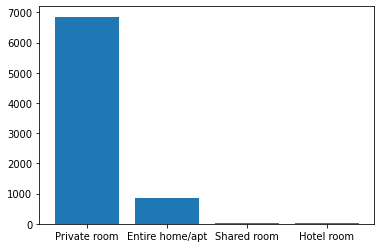

In [ ]:
#See what types of houses are most popular
data = summary_listings['room_type'].value_counts().tolist()
a = summary_listings['room_type'].unique()
plt.bar(x=a, height=data)

In [ ]:
summary_listings.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,6858.0,296.895013,407.757265,8.0,145.25,219.0,338.0,10500.0
Hotel room,25.0,998.480000,2709.609014,0.0,200.00,226.0,238.0,10000.0
Private room,839.0,200.779499,415.884680,21.0,54.00,84.0,136.5,3299.0
Shared room,11.0,143.454545,154.495543,25.0,41.50,57.0,188.0,500.0


In [ ]:
summary_listings[['host_id','name']].groupby('host_id').count().sort_values(by='name', ascending=False)

,name
host_id,
101426897,178
85360355,127
20772148,124
134126657,114
115505661,91
...,...
55055577,1
55175940,1
55191749,1


In [ ]:
summary_listings['minimum_nights'].describe()

count    7733.000000
mean        5.912582
std        22.712800
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       999.000000
Name: minimum_nights, dtype: float64

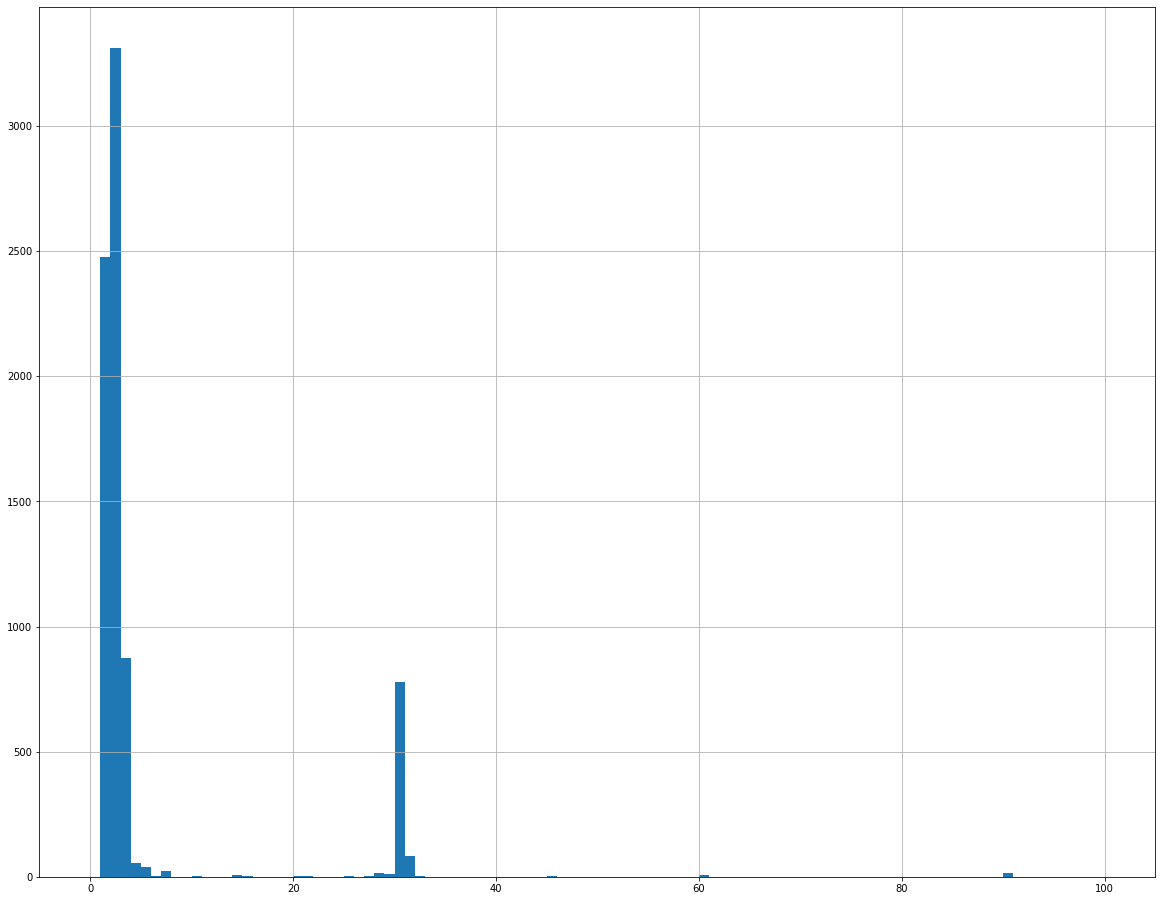

In [ ]:
summary_listings['minimum_nights'].hist(bins = 100, range=(0, 100), figsize=(20,16))

In [ ]:
reviews = pd.read_csv('reviews.csv')
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493310 entries, 0 to 493309
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     493310 non-null  int64 
 1   id             493310 non-null  int64 
 2   date           493310 non-null  object
 3   reviewer_id    493310 non-null  int64 
 4   reviewer_name  493309 non-null  object
 5   comments       493148 non-null  object
dtypes: int64(3), object(3)
memory usage: 22.6+ MB


In [ ]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...
1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...
2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...
3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...
4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...


In [ ]:
reviews['date'] = pd.to_datetime(reviews['date'],format='%Y/%m/%d')

In [ ]:
reviews['weekday'] = reviews['date'].dt.weekday
reviews['month'] = reviews['date'].dt.month
reviews['year'] = reviews['date'].dt.year

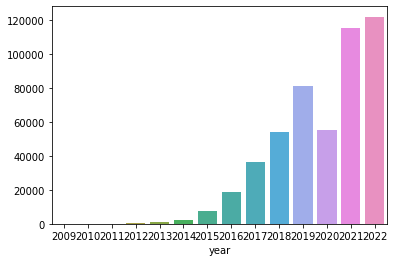

In [ ]:
n_reviews_year = reviews.groupby('year').size();
sns.barplot(x = n_reviews_year.index, y = n_reviews_year.values);
plt.show();

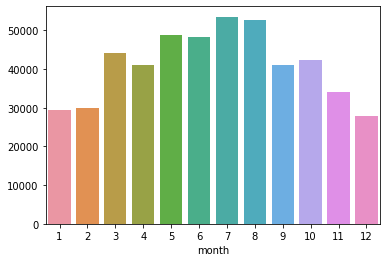

In [ ]:
n_reviews_month = reviews.groupby('month').size();
sns.barplot(x = n_reviews_month.index, y = n_reviews_month.values);
plt.show();

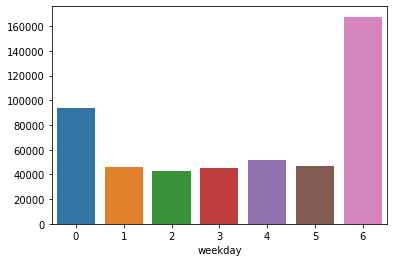

In [ ]:
n_reviews_week = reviews.groupby('weekday').size();
sns.barplot(x = n_reviews_week.index, y = n_reviews_week.values);
plt.show();

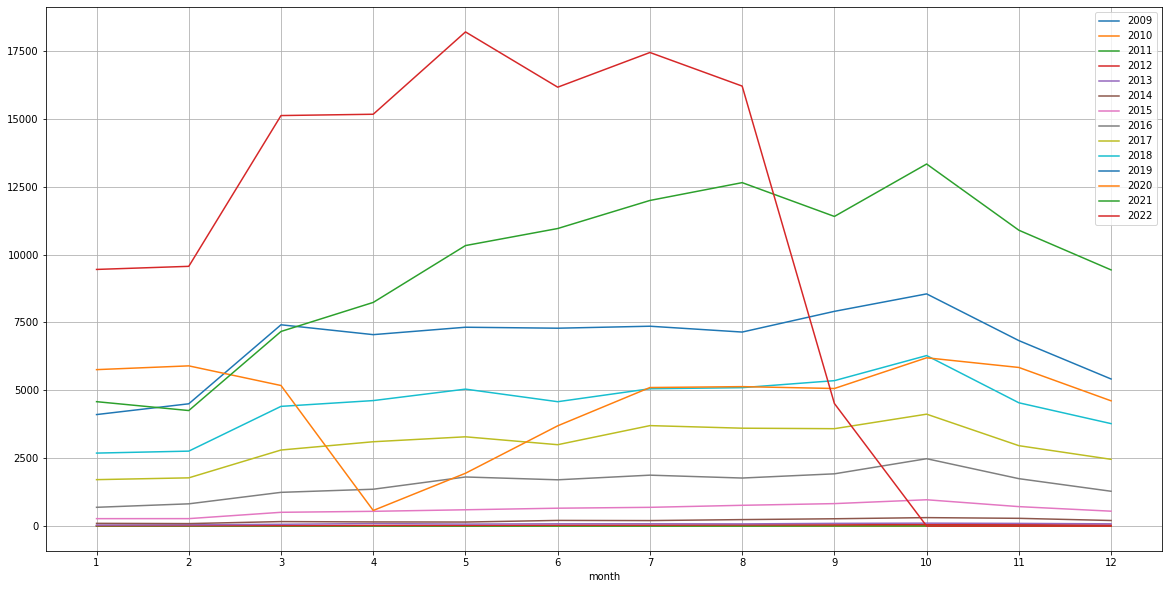

In [ ]:
year_month_reviews = reviews.groupby(['year', 'month']).size().unstack('month').fillna(0);
# Plot (month-comment) line chart by month
fig, ax = plt.subplots(figsize=(20,10));
for index in year_month_reviews.index:
    series = year_month_reviews.loc[index];
    sns.lineplot(x = series.index, y = series.values, ax = ax);
ax.legend(labels = year_month_reviews.index);
ax.grid();
# Display all months on the horizontal axis
_ = ax.set_xticks(list(range(1,13)))
plt.show();

In [ ]:
calendar = pd.read_csv('calendar.csv')
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822188 entries, 0 to 2822187
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 150.7+ MB


In [ ]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,17653675,2022-09-15,f,$79.00,$79.00,1.0,1125.0
1,17653675,2022-09-16,f,$94.00,$94.00,2.0,1125.0
2,17653675,2022-09-17,f,$96.00,$96.00,2.0,1125.0
3,17653675,2022-09-18,f,$83.00,$83.00,1.0,1125.0
4,17653675,2022-09-19,t,$79.00,$79.00,1.0,1125.0


In [ ]:
#Remove the $ sign from the price
calendar['price'] = calendar['price'].replace(r"[$,]","",regex=True).astype(np.float32)
calendar['adjusted_price'] = calendar['adjusted_price'].replace(r"[$,]","",regex = True).astype(np.float32)
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,17653675,2022-09-15,f,79.0,79.0,1.0,1125.0
1,17653675,2022-09-16,f,94.0,94.0,2.0,1125.0
2,17653675,2022-09-17,f,96.0,96.0,2.0,1125.0
3,17653675,2022-09-18,f,83.0,83.0,1.0,1125.0
4,17653675,2022-09-19,t,79.0,79.0,1.0,1125.0


In [ ]:
calendar['date'] = pd.to_datetime(calendar['date'],format='%Y/%m/%d')

In [ ]:
#Add week and month
calendar['weekday'] = calendar['date'].dt.weekday
calendar['month'] = calendar['date'].dt.month


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


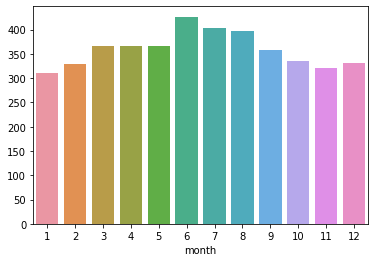

In [ ]:
#Plot a histogram by grouping prices by month and averaging them:
month_price = calendar.groupby('month')['price'].mean()
sns.barplot(month_price.index,month_price.values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


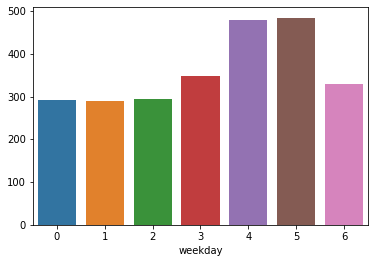

In [ ]:
weekday_price = calendar.groupby('weekday')['price'].mean()
sns.barplot(weekday_price.index, weekday_price.values)

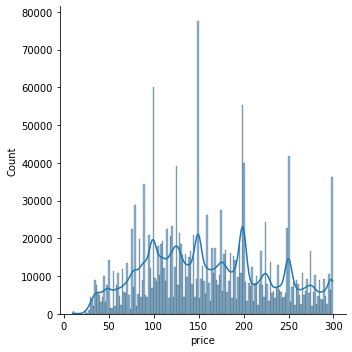

In [ ]:
#View histograms with prices less than 300
sns.displot(calendar[calendar['price'] < 300]['price'], kde = True)
plt.show()